In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

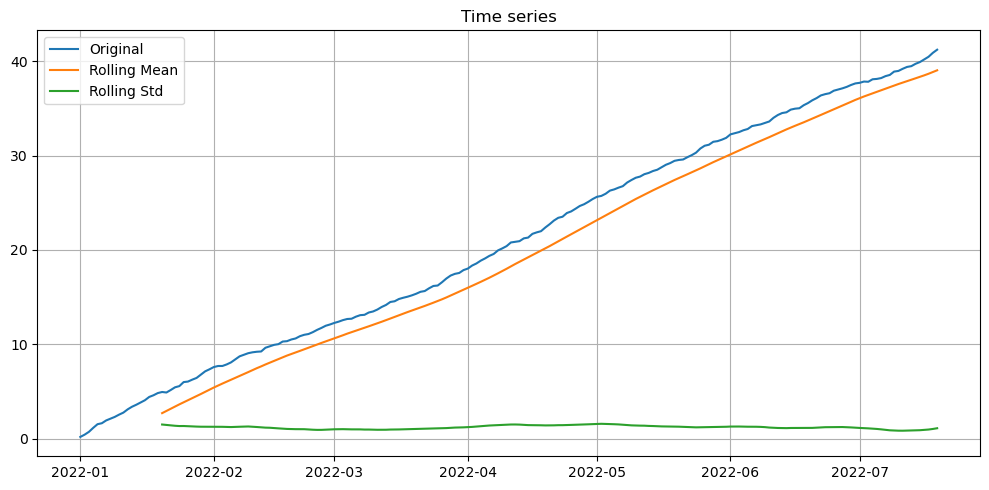

ADF 통계량 : -0.6122
p-value : 0.8682
사용된 시차 수 : 0
사용된 샘플 수 : 199
임계값 :
1% : -3.4636
5% : -2.8762
10% : -2.5746
p-value >= 0.05 이므로 귀무가설 채택
비정상시계열


In [ ]:
np.random.seed(0)
n = 200
time_index = pd.date_range(start='2022-01-01', periods=n)

trend = 0.2 * np.arange(n)
noise = np.random.normal(scale=0.1, size=n).cumsum()
y = trend + noise

ts = pd.Series(y, index=time_index)

def plot_series_with_rolling(series, window=20, title='Time series'):
    roll_mean = series.rolling(window).mean()
    roll_std = series.rolling(window).std()

    plt.figure(figsize=(10,5))
    plt.plot(series, label='Original')
    plt.plot(roll_mean, label='Rolling Mean')
    plt.plot(roll_std, label='Rolling Std')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def adf_test(series, name='Time series'): # 정상성확인
    # 귀무가설 : 단위근이 있다.(비정상시계열) / 대립가설 : 단위근이 없다(정상시계열)
    result = adfuller(series.dropna())

    stat, pvalue, usedlag, nobs, crit_vals, icbest = result

    print(f'ADF 통계량 : {stat:.4f}')
    print(f'p-value : {pvalue:.4f}')
    print(f'사용된 시차 수 : {usedlag}')
    print(f'사용된 샘플 수 : {nobs}')
    
    print('임계값 :')
    for key, val in crit_vals.items():
        print(f'{key} : {val:.4f}')

    if pvalue < 0.05:
        print('p-value < 0.05 이므로 귀무가설 기각')
        print('정상시계열')
    else:
        print('p-value >= 0.05 이므로 귀무가설 채택')
        print('비정상시계열')

plot_series_with_rolling(ts, window=20)
adf_test(ts)

In [12]:
# 차분 y_t - y_(t-1)​
ts_diff = ts.diff().dropna()
adf_test(ts_diff)


ADF 통계량 : -13.4669
p-value : 0.0000
사용된 시차 수 : 0
사용된 샘플 수 : 198
임계값 :
1% : -3.4638
5% : -2.8763
10% : -2.5746
p-value < 0.05 이므로 귀무가설 기각
정상시계열
